In [ ]:
!nvidia-smi

Thu Jul  7 02:20:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d amanullahasraf/covid19-pneumonia-normal-chest-xray-pa-dataset

100% 1.90G/1.91G [00:58<00:00, 55.2MB/s]
100% 1.91G/1.91G [00:58<00:00, 34.8MB/s]


In [ ]:
! mkdir dataset

In [ ]:
! unzip covid19-pneumonia-normal-chest-xray-pa-dataset.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/covid/COVID19(303).jpg  
  inflating: /content/dataset/covid/COVID19(304).jpg  
  inflating: /content/dataset/covid/COVID19(305).jpg  
  inflating: /content/dataset/covid/COVID19(306).jpg  
  inflating: /content/dataset/covid/COVID19(307).jpg  
  inflating: /content/dataset/covid/COVID19(308).jpg  
  inflating: /content/dataset/covid/COVID19(309).jpg  
  inflating: /content/dataset/covid/COVID19(31).jpg  
  inflating: /content/dataset/covid/COVID19(310).jpg  
  inflating: /content/dataset/covid/COVID19(311).jpg  
  inflating: /content/dataset/covid/COVID19(312).jpg  
  inflating: /content/dataset/covid/COVID19(313).jpg  
  inflating: /content/dataset/covid/COVID19(314).jpg  
  inflating: /content/dataset/covid/COVID19(315).jpg  
  inflating: /content/dataset/covid/COVID19(316).jpg  
  inflating: /content/dataset/covid/COVID19(317).jpg  
  inflating: /content/dataset/covid/COVID19(318).jpg  
  inflating: /c

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/dataset", output="dataset1",
    seed=42, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values


Copying files: 6939 files [00:07, 976.24 files/s] 


In [ ]:
#!cp "/content/dataset1" -r "/content/drive/MyDrive"

In [ ]:
ls ../content/

covid19-pneumonia-normal-chest-xray-pa-dataset.zip  dataset1/  sample_data/
dataset/                                            drive/


In [ ]:
#!cp "/content/drive/MyDrive" -r "/content/dataset1"

In [ ]:
from glob import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
TRAIN_PATH = "/content/dataset1/train"
VAL_PATH = "/content/dataset1/val"
TEST_PATH = "/content/dataset1/test"

In [ ]:
from keras.preprocessing import image

In [ ]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'sparse')

Found 5522 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'sparse')

Found 690 images belonging to 3 classes.


In [ ]:
import keras
from keras.layers import *
from keras.models import *

In [ ]:
from tensorflow.keras.optimizers import RMSprop
img_dims=224
inputs = Input(shape=(img_dims, img_dims, 3))

    # 1st conv block
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', trainable=False, padding='same')(inputs)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', trainable=False, padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

    # 2nd conv block
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', trainable=False, padding='same')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', trainable=False, padding='same')(x)
x = BatchNormalization()(x)  
x = MaxPool2D(pool_size=(2, 2))(x)

    # 3rd conv block
x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', trainable=False, padding='same')(x)
x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', trainable=False, padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

    # 4th conv block
x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', trainable=False, padding='same')(x)
x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', trainable=False, padding='same')(x)
x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', trainable=False, padding='same')(x)
x = BatchNormalization()(x)  
x = MaxPool2D(pool_size=(2, 2))(x)

    # 5th conv block
x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', trainable=False, padding='same')(x)
x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', trainable=False, padding='same')(x)
x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', trainable=False, padding='same')(x)
x = BatchNormalization()(x)    
x = MaxPool2D(pool_size=(2, 2))(x)
#     x = AveragePooling2D(pool_size=(4, 4))(x)

    # LSTM layer
x = Reshape((49, 512))(x)
x = ((GRU(512, activation="relu", return_sequences=True, trainable=False)))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
    
    # FC layer
x = Flatten(name="flatten")(x)
x = Dense(units=64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

    # Output layer
output = Dense(units=3, activation='softmax')(x)

model1 = Model(inputs=inputs, outputs=output)
#     opt = SGD(lr=0.01)
opt = RMSprop(lr=0.0001, decay=1e-6)
model1.compile(loss=keras.losses.sparse_categorical_crossentropy,
                  optimizer=opt, metrics=["accuracy"])
#                   metrics=['acc', tf.keras.metrics.AUC()],experimental_run_tf_function=False)
model1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_24 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_25 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_14 (Bat  (None, 224, 224, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 112, 112, 128)     7385

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,TensorBoard,TerminateOnNaN, LearningRateScheduler
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold
from datetime import datetime


from math import floor
N_FOLDS = 5
EPOCHS = 200
INIT_LR = 2e-4
T_BS = 32
V_BS = 32
decay_rate = 0.95
decay_step = 1
learning_rate = 1e-4

def scheduler(epoch):
    if epoch < 10:
        return 2e-4
    else:
        global learning_rate
        learning_rate *=  decay_rate
        print('learning_rate: '+ str(learning_rate))
        return learning_rate

callback3 = LearningRateScheduler(scheduler)

skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True)
log_dir = "./logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
earlyStop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='auto',
    verbose=1,
    baseline=None
)
callbacks = [ModelCheckpoint(filepath='best_cnn-lstm_model.h5', monitor='val_loss',mode='auto',verbose=1,save_best_only=True,save_weights_only=True),
             callback3,
             earlyStop,
             #tensorboard_callback
             ]

In [ ]:
history = model1.fit(
                train_generator,
                steps_per_epoch=train_generator.n//train_generator.batch_size,
                validation_data=validation_generator,
                validation_steps=validation_generator.n//validation_generator.batch_size,
                epochs=EPOCHS,
                callbacks=callbacks)

Epoch 1/200
172/172 [==============================] - ETA: 0s - loss: 0.7813 - accuracy: 0.7306
Epoch 1: val_loss improved from inf to 2.13008, saving model to best_cnn-lstm_model.h5
172/172 [==============================] - 158s 798ms/step - loss: 0.7813 - accuracy: 0.7306 - val_loss: 2.1301 - val_accuracy: 0.3289 - lr: 2.0000e-04
Epoch 2/200
172/172 [==============================] - ETA: 0s - loss: 0.5158 - accuracy: 0.8155
Epoch 2: val_loss did not improve from 2.13008
172/172 [==============================] - 127s 740ms/step - loss: 0.5158 - accuracy: 0.8155 - val_loss: 3.6408 - val_accuracy: 0.3274 - lr: 2.0000e-04
Epoch 3/200
172/172 [==============================] - ETA: 0s - loss: 0.4789 - accuracy: 0.8339
Epoch 3: val_loss did not improve from 2.13008
172/172 [==============================] - 127s 739ms/step - loss: 0.4789 - accuracy: 0.8339 - val_loss: 2.3024 - val_accuracy: 0.5580 - lr: 2.0000e-04
Epoch 4/200
172/172 [==============================] - ETA: 0s - loss: 0

In [ ]:
model1.save("model_adv.h5")

In [ ]:
model1.evaluate(train_generator)

173/173 [==============================] - 117s 673ms/step - loss: 0.1802 - accuracy: 0.9402


[0.1802409440279007, 0.9402390718460083]

In [ ]:
model1.evaluate(validation_generator)

22/22 [==============================] - 8s 356ms/step - loss: 0.1907 - accuracy: 0.9377


[0.19072148203849792, 0.9376811385154724]

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, classification_report


test_generator = test_dataset.flow_from_directory(
    TEST_PATH,
    color_mode="rgb",
    target_size = (224,224),
    batch_size = 32,
    shuffle=False,
    class_mode = None)

hist_df = pd.DataFrame(history.history) 
hist_csv_file = 'history.csv'

test_generator.reset()

predY1=model1.predict(
            test_generator,
            steps=test_generator.n/test_generator.batch_size,verbose=1)

print(len(np.argmax(predY1, axis = -1)))
class_to_label_map = {'covid': 0, 'normal': 1, 'pneumonia': 2}
testY1 = test_generator.classes
confusion__matrix=confusion_matrix(testY1, np.argmax(predY1, axis = -1))
cr=(classification_report(testY1, np.argmax(predY1, axis = -1), target_names=class_to_label_map, output_dict=True, digits=4))
print (cr)
print(confusion__matrix)
    
cm_df = pd.DataFrame(confusion__matrix)
cr_df = pd.DataFrame(cr)
with open(hist_csv_file, mode='a') as f:
      hist_df.to_csv(f)
      cm_df.to_csv(f)
      cr_df.to_csv(f)

Found 690 images belonging to 3 classes.
21/21 [==============================] - 9s 370ms/step
690
{'covid': {'precision': 0.9525862068965517, 'recall': 0.9778761061946902, 'f1-score': 0.9650655021834061, 'support': 226}, 'normal': {'precision': 0.9087136929460581, 'recall': 0.9439655172413793, 'f1-score': 0.9260042283298097, 'support': 232}, 'pneumonia': {'precision': 0.9723502304147466, 'recall': 0.9094827586206896, 'f1-score': 0.9398663697104677, 'support': 232}, 'accuracy': 0.9434782608695652, 'macro avg': {'precision': 0.9445500434191189, 'recall': 0.9437747940189197, 'f1-score': 0.9436453667412278, 'support': 690}, 'weighted avg': {'precision': 0.9444801637367065, 'recall': 0.9434782608695652, 'f1-score': 0.9434591046939046, 'support': 690}}
[[221   3   2]
 [  9 219   4]
 [  2  19 211]]


In [ ]:
print(classification_report(testY1, np.argmax(predY1, axis = -1), target_names = ['normal', 'covid', 'pneumonia'], digits=4))

              precision    recall  f1-score   support

      normal     0.9526    0.9779    0.9651       226
       covid     0.9087    0.9440    0.9260       232
   pneumonia     0.9724    0.9095    0.9399       232

    accuracy                         0.9435       690
   macro avg     0.9446    0.9438    0.9436       690
weighted avg     0.9445    0.9435    0.9435       690



MODIFIED MODEL WITH VGG

In [ ]:
from tensorflow.keras.applications import VGG16


# CNN Based Model in Keras
baseModel = VGG16(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

for layer in baseModel.layers:
        layer.trainable = False
x = baseModel.output

x = Reshape((49, 512))(x)
# x = ((LSTM(512, activation="relu", return_sequences=True, trainable=False)))(x)
x = ((GRU(512, activation="relu", return_sequences=True, trainable=False)))(x)
x = BatchNormalization()(x)

#     x = Dropout(0.5)(x)
 # FC layer
x = Flatten(name="flatten")(x)
    
    # fc1 layer
x = Dense(units=4096, activation='relu')(x)
x = BatchNormalization()(x)
#     x = Dropout(0.5)(x)

    # fc2 layer
x = Dense(units=4096, activation='relu')(x)
x = BatchNormalization()(x)
#     x = Dropout(0.5)(x)
    
    # Output layer
output = Dense(units=3, activation='softmax')(x)

model = Model(inputs=baseModel.input, outputs=output)


# model = Sequential()
# model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(3,activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()


58900480/58889256 [==============================] - 1s 0us/step
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,TensorBoard,TerminateOnNaN, LearningRateScheduler
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold
from datetime import datetime


from math import floor
N_FOLDS = 5
EPOCHS = 400
INIT_LR = 2e-4
T_BS = 32
V_BS = 32
decay_rate = 0.95
decay_step = 1
learning_rate = 1e-4

def scheduler(epoch):
    if epoch < 10:
        return 2e-4
    else:
        global learning_rate
        learning_rate *=  decay_rate
        print('learning_rate: '+ str(learning_rate))
        return learning_rate

callback3 = LearningRateScheduler(scheduler)

skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True)
log_dir = "./logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
earlyStop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='auto',
    verbose=1,
    baseline=None
)
callbacks = [ModelCheckpoint(filepath='best_vgg16_gru_model.h5', monitor='val_accuracy',mode='auto',verbose=1,save_best_only=True,save_weights_only=True),
             callback3,
             earlyStop,
             #tensorboard_callback
             ]

In [ ]:
history = model.fit(
                train_generator,
                steps_per_epoch=train_generator.n//train_generator.batch_size,
                validation_data=validation_generator,
                validation_steps=validation_generator.n//validation_generator.batch_size,
                epochs=EPOCHS,
                callbacks=callbacks)

Epoch 1/400
172/172 [==============================] - ETA: 0s - loss: 0.8238 - accuracy: 0.8463
Epoch 1: val_accuracy improved from -inf to 0.40774, saving model to best_vgg16_gru_model.h5
172/172 [==============================] - 134s 770ms/step - loss: 0.8238 - accuracy: 0.8463 - val_loss: 2.5614 - val_accuracy: 0.4077 - lr: 2.0000e-04
Epoch 2/400
172/172 [==============================] - ETA: 0s - loss: 0.3550 - accuracy: 0.8951
Epoch 2: val_accuracy improved from 0.40774 to 0.79911, saving model to best_vgg16_gru_model.h5
172/172 [==============================] - 132s 768ms/step - loss: 0.3550 - accuracy: 0.8951 - val_loss: 0.6134 - val_accuracy: 0.7991 - lr: 2.0000e-04
Epoch 3/400
172/172 [==============================] - ETA: 0s - loss: 0.2873 - accuracy: 0.9124
Epoch 3: val_accuracy improved from 0.79911 to 0.90774, saving model to best_vgg16_gru_model.h5
172/172 [==============================] - 129s 746ms/step - loss: 0.2873 - accuracy: 0.9124 - val_loss: 0.3124 - val_ac

In [ ]:
model.save("model_vgg16_gru.h5")

In [ ]:
model.evaluate(train_generator)

173/173 [==============================] - 114s 659ms/step - loss: 0.0452 - accuracy: 0.9835


[0.045194726437330246, 0.9835204482078552]

In [ ]:
model.evaluate(validation_generator)

22/22 [==============================] - 8s 359ms/step - loss: 0.2078 - accuracy: 0.9507


[0.20782612264156342, 0.9507246613502502]

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, classification_report


test_generator = test_dataset.flow_from_directory(
    TEST_PATH,
    color_mode="rgb",
    target_size = (224,224),
    batch_size = 32,
    shuffle=False,
    class_mode = None)

hist_df = pd.DataFrame(history.history) 
hist_csv_file = 'history.csv'

test_generator.reset()

predY=model.predict(
            test_generator,
            steps=test_generator.n/test_generator.batch_size,verbose=1)

print(len(np.argmax(predY, axis = -1)))
class_to_label_map = {'covid': 0, 'normal': 1, 'pneumonia': 2}
testY = test_generator.classes
confusion__matrix=confusion_matrix(testY, np.argmax(predY, axis = -1))
cr=(classification_report(testY, np.argmax(predY, axis = -1), target_names=class_to_label_map, output_dict=True, digits=4))
print (cr)
print(confusion__matrix)
    
cm_df = pd.DataFrame(confusion__matrix)
cr_df = pd.DataFrame(cr)
with open(hist_csv_file, mode='a') as f:
      hist_df.to_csv(f)
      cm_df.to_csv(f)
      cr_df.to_csv(f)

Found 690 images belonging to 3 classes.
21/21 [==============================] - 9s 381ms/step
690
{'covid': {'precision': 0.9823008849557522, 'recall': 0.9823008849557522, 'f1-score': 0.9823008849557522, 'support': 226}, 'normal': {'precision': 0.9253112033195021, 'recall': 0.9612068965517241, 'f1-score': 0.9429175475687105, 'support': 232}, 'pneumonia': {'precision': 0.9641255605381166, 'recall': 0.9267241379310345, 'f1-score': 0.945054945054945, 'support': 232}, 'accuracy': 0.9565217391304348, 'macro avg': {'precision': 0.9572458829377903, 'recall': 0.9567439731461702, 'f1-score': 0.9567577925264693, 'support': 690}, 'weighted avg': {'precision': 0.9570280133550254, 'recall': 0.9565217391304348, 'f1-score': 0.9565356786792582, 'support': 690}}
[[222   3   1]
 [  2 223   7]
 [  2  15 215]]


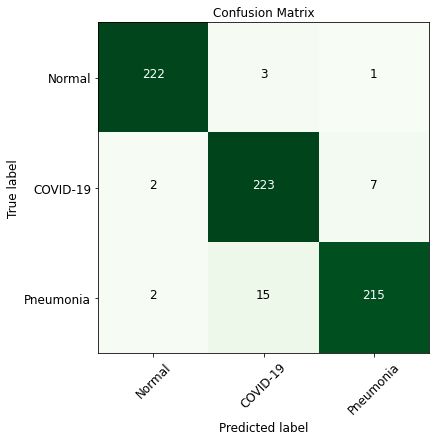

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 'larger')

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45, fontsize = 'larger')
        plt.yticks(tick_marks, target_names, fontsize = 'larger')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black", fontsize = 'larger')
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black", fontsize = 'larger')


    plt.tight_layout()
    plt.ylabel('True label', fontsize = 'larger')
    plt.xlabel('Predicted label', fontsize = 'larger')
#     plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(confusion__matrix, 
                      normalize = False,
                      target_names = ['Normal', 'COVID-19', 'Pneumonia'],
                      title        = "Confusion Matrix")

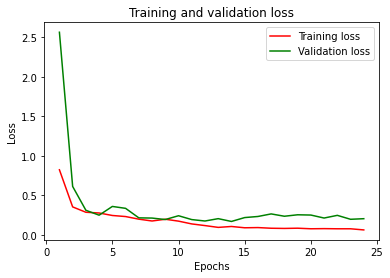

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

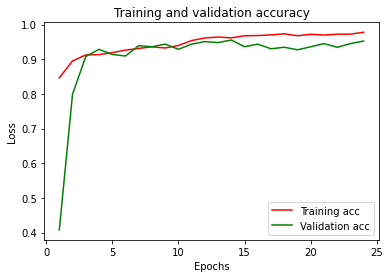

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(classification_report(testY, np.argmax(predY, axis = -1), target_names = ['normal', 'covid', 'pneumonia'], digits=4))

              precision    recall  f1-score   support

      normal     0.9823    0.9823    0.9823       226
       covid     0.9253    0.9612    0.9429       232
   pneumonia     0.9641    0.9267    0.9451       232

    accuracy                         0.9565       690
   macro avg     0.9572    0.9567    0.9568       690
weighted avg     0.9570    0.9565    0.9565       690



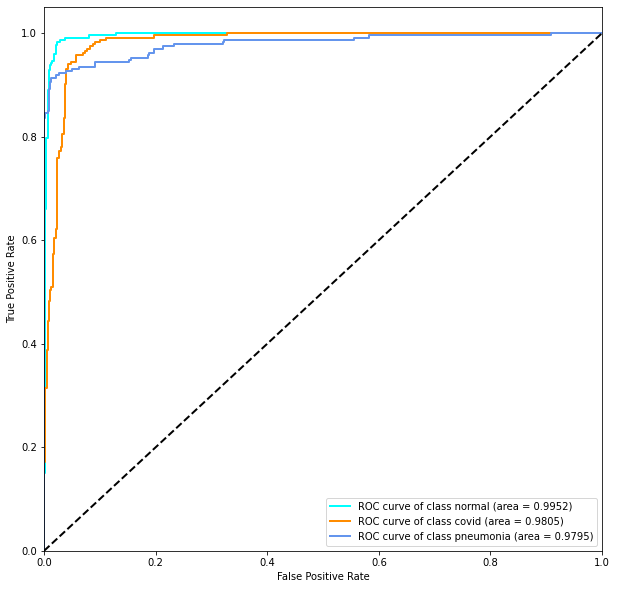

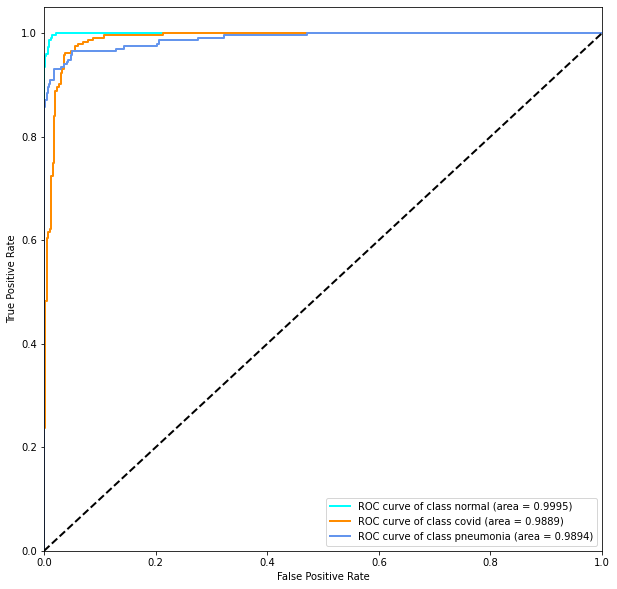

In [ ]:
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, auc

class_to_label_map = ['normal', 'covid', 'pneumonia']

def plot_multiclass_roc(y_test, y_score, n_classes, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    plt.figure(figsize=(10, 10))
    lw = 2

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = ['aqua', 'darkorange', 'cornflowerblue']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.4f})'
                 ''.format(class_to_label_map[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
#     plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()
plot_multiclass_roc(testY1, predY1, n_classes=3, figsize=(10, 10))
plot_multiclass_roc(testY, predY, n_classes=3, figsize=(10, 10))